In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [122]:
df = pd.read_excel('superstore.xls')

In [124]:
df['Segment'].value_counts(),df['Region'].value_counts(),df['Category'].value_counts()

(Consumer       5191
 Corporate      3020
 Home Office    1783
 Name: Segment, dtype: int64,
 West       3203
 East       2848
 Central    2323
 South      1620
 Name: Region, dtype: int64,
 Office Supplies    6026
 Furniture          2121
 Technology         1847
 Name: Category, dtype: int64)

In [125]:
df['Segment'] = df['Segment'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Category'] = df['Category'].astype('category')

In [126]:
sales_df = df[['Segment','Sales','Region','Category']]

sum_by_region = df[['Region','Sales']].groupby('Region').sum()
sum_by_region = sum_by_region.reset_index()
sum_region = sum_by_region.iloc[:,1:]
label_region = sum_by_region.iloc[:,:1]

x = np.arange(len(label_region)) # Encontrar el tamaño de las etiquetas
labels = np.array(label_region) # Etiquetas
width = 0.35 # ancho de la barra 

In [127]:
# Suma individual de ventas por segmento por Region
sum_by_seg_reg = df[['Region','Segment','Sales']].groupby(['Region','Segment']).sum()
sum_by_seg_reg = sum_by_seg_reg.reset_index()

reg_temp_1 = sum_by_seg_reg[sum_by_seg_reg['Segment'].isin(['Consumer'])]
reg_temp_2 = sum_by_seg_reg[sum_by_seg_reg['Segment'].isin(['Corporate'])]
reg_temp_3 = sum_by_seg_reg[sum_by_seg_reg['Segment'].isin(['Home Office'])]


reg1 = np.array(reg_temp_1['Sales'])
reg2 = np.array(reg_temp_2['Sales'])
reg3 = np.array(reg_temp_3['Sales'])

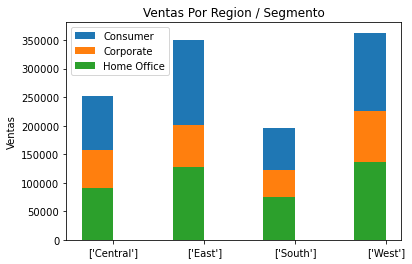

In [128]:
fig,ax = plt.subplots()

rects1 = ax.bar(x - width/2, reg1, width, label='Consumer')
rects2 = ax.bar(x - width/2, reg2, width, label='Corporate')
rects3 = ax.bar(x - width/2, reg3, width, label='Home Office')


ax.set_ylabel('Ventas')
ax.set_title('Ventas Por Region / Segmento')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   category      
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   category      
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   category      
 15  Sub-Category   9994 n

# Categoria de producto con mas Ventas.

In [148]:
df.convert_dtypes().dtypes ## Ver recomendación de la función para los tipos de dato

Row ID                    Int64
Order ID                 string
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                string
Customer ID              string
Customer Name            string
Segment                category
Country                  string
City                     string
State                    string
Postal Code               Int64
Region                 category
Product ID               string
Category               category
Sub-Category             string
Product Name             string
Sales                   Float64
Quantity                  Int64
Discount                Float64
Profit                  Float64
dtype: object

In [173]:
df['Order Date'].value_counts(), df['Category'].value_counts()

(2016-09-05    38
 2017-09-02    36
 2016-11-10    35
 2017-12-02    34
 2017-12-01    34
               ..
 2016-02-25     1
 2014-01-15     1
 2014-09-24     1
 2017-07-12     1
 2015-12-09     1
 Name: Order Date, Length: 1237, dtype: int64,
 Office Supplies    6026
 Furniture          2121
 Technology         1847
 Name: Category, dtype: int64)

In [201]:
df['Order Date'] = pd.to_datetime(
    df['Order Date'],
    errors = 'coerse',
    format = '%m/%d/%Y'
)

df_catg = df[['Order Date','Category','Sales']].groupby(['Category',pd.Grouper(key = 'Order Date',freq='3M')]).sum()
df_catg = df_catg.reset_index()

df_fur = df_catg[df_catg['Category'].isin(['Furniture'])].reset_index()
df_ofc = df_catg[df_catg['Category'].isin(['Office Supplies'])].reset_index()
df_tec = df_catg[df_catg['Category'].isin(['Technology'])].reset_index()

,index,Category,Order Date,Sales
0,0,Furniture,2014-01-31,6242.5250
1,1,Furniture,2014-04-30,24358.4510
2,2,Furniture,2014-07-31,30939.9636
3,3,Furniture,2014-10-31,43441.0743
4,4,Furniture,2015-01-31,63950.7808
5,5,Furniture,2015-04-30,26109.8555
6,6,Furniture,2015-07-31,30763.5495
7,7,Furniture,2015-10-31,47938.2387
8,8,Furniture,2016-01-31,61589.3947
9,9,Furniture,2016-04-30,29938.7330


In [202]:
xdata1 = df_fur['Order Date']
xdata2 = df_ofc['Order Date']
xdata3 = df_tec['Order Date']

ydata1 = df_fur['Sales']
ydata2 = df_ofc['Sales']
ydata3 = df_tec['Sales']

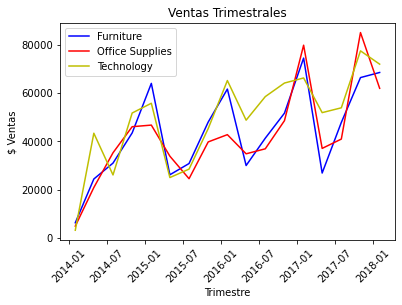

In [210]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(xdata1,ydata1,color='b',label='Furniture')
ax.plot(xdata2,ydata2,color='r',label='Office Supplies')
ax.plot(xdata3,ydata3,color='y',label='Technology')

ax.set(xlabel='Trimestre',ylabel='$ Ventas',title='Ventas Trimestrales')
ax.legend()
plt.xticks(rotation=45)
plt.show()